In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
import keras
from tensorflow.keras import optimizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



In [ ]:
#importing the mfcc,,mel_spec dataset dataset

mfcc_dataset = pd.read_csv('mfcc_melspec.csv')


FileNotFoundError: ignored

In [ ]:
mfcc_dataset.head()

In [ ]:
emotions = mfcc_dataset['labels'].unique()

In [ ]:
X = mfcc_dataset.iloc[:,1:-1].values
y = mfcc_dataset.iloc[:,-1].values

def encode_labels(dataset):
    labels = dataset['labels']
    labels = [index for val in labels for index,value in enumerate(emotions) if val == value]
    return labels

#labels = encode_labels(mfcc_dataset)
#mfcc_dataset['labels'] = labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
mfcc_dataset['labels']

In [ ]:

#Function to split the data into train and test set and perform scaling of all features

def split_scale(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=25)


   # X_train = StandardScaler().fit_transform(X_train)
   # X_test = StandardScaler().fit_transform(X_test)
    
    return X_train,X_test,y_train,y_test


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X,y)

In [ ]:
X_train.shape

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

In [ ]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(141,1)))        
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))


model.add(Conv1D(128, 5,padding='same',))                           
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8))                                                 
model.add(Activation('softmax'))

opt = optimizers.RMSprop(lr=0.00005,rho=0.9, epsilon=None, decay=0.0)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=5, min_lr=0.0000001)
#cnn=model.fit(X_train, y_train, batch_size=20, epochs=350, validation_data=(X_test, y_test))

In [ ]:
'''fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn.history["loss"], label="loss")
plt.plot(cnn.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()'''

In [ ]:
'''fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn.history["accuracy"], label="accuracy")
plt.plot(cnn.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()'''

MFCC+MEL Sprectrogram+Chroma


In [ ]:
mfcc_mel_chroma_dataset = pd.read_csv('dataset1.csv')



In [ ]:
mfcc_mel_chroma_dataset.head()

In [ ]:
X = mfcc_mel_chroma_dataset.iloc[:,1:-1].values
y = mfcc_mel_chroma_dataset.iloc[:,-1].values
X.shape,y.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
mfcc_dataset['labels']
print(y)

In [ ]:
X_train, X_test, y_train, y_test = split_scale(X,y)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

In [ ]:
model2 = Sequential()

model2.add(Conv1D(128, 3,padding='same',input_shape=(187,1)))        
model2.add(Activation('relu'))
model2.add(MaxPooling1D(pool_size=(2)))
model2.add(Dropout(0.1))

model2.add(Conv1D(256, 3,padding='same',))                           
model2.add(Activation('relu'))
model2.add(MaxPooling1D(pool_size=(2)))
model2.add(Dropout(0.1))

model2.add(Conv1D(512, 3,padding='same',))                           
model2.add(Activation('relu'))
model2.add(MaxPooling1D(pool_size=(2)))
model2.add(Dropout(0.1))

model2.add(Flatten())
model2.add(Dense(8))                                                 
model2.add(Activation('softmax'))


opt = optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=None, decay=0.0)

In [ ]:
model2.summary()

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
cnn2=model2.fit(X_train, y_train, batch_size=20, epochs=35, validation_data=(X_test, y_test))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn2.history["loss"], label="loss")
plt.plot(cnn2.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn2.history["accuracy"], label="accuracy")
plt.plot(cnn2.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
predictions = model.predict(X_test)
print(pred)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

In [ ]:
loss, acc = model2.evaluate(X_test, y_test)
print("Accuracy: {:5.2f}%".format(100*acc))

6-7 SPectral Features

In [ ]:
data = pd.read_csv('dataset3.csv')



In [ ]:
data.head()

NameError: ignored

In [ ]:
X2 = data.iloc[:,1:-1].values
y2 = data.iloc[:,-1].values

X2.shape,y2.shape


((1440, 198), (1440,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y2 = encoder.fit_transform(y2)
data['labels']
print(y2)

[7 5 2 ... 6 2 0]


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X2,y2)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1008, 198, 1)

In [ ]:
model3 = Sequential()

model3.add(Conv1D(128, 3,padding='same',input_shape=(198,1)))        
model3.add(Activation('relu'))
model3.add(Dropout(0.1))
model3.add(MaxPooling1D(pool_size=(2)))

model3.add(Conv1D(128, 3,padding='same'))        
model3.add(Activation('relu'))
model3.add(MaxPooling1D(pool_size=(2)))
model3.add(Dropout(0.1))

model3.add(Flatten())
model3.add(Dense(8))                                                 
model3.add(Activation('softmax'))

opt = optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 198, 128)          512       
                                                                 
 activation_45 (Activation)  (None, 198, 128)          0         
                                                                 
 dropout_33 (Dropout)        (None, 198, 128)          0         
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 99, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_34 (Conv1D)          (None, 99, 128)           49280     
                                                                 
 activation_46 (Activation)  (None, 99, 128)           0         
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
cnn3=model3.fit(X_train, y_train, batch_size=15, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
68/68 [==============================] - 4s 45ms/step - loss: 3.4050 - accuracy: 0.1240 - val_loss: 2.2500 - val_accuracy: 0.2037
Epoch 2/300
68/68 [==============================] - 3s 40ms/step - loss: 2.7255 - accuracy: 0.1815 - val_loss: 2.1429 - val_accuracy: 0.2083
Epoch 3/300
68/68 [==============================] - 3s 41ms/step - loss: 2.5466 - accuracy: 0.1964 - val_loss: 2.2380 - val_accuracy: 0.2199
Epoch 4/300
68/68 [==============================] - 3s 42ms/step - loss: 2.3924 - accuracy: 0.1944 - val_loss: 2.0222 - val_accuracy: 0.2778
Epoch 5/300
68/68 [==============================] - 3s 41ms/step - loss: 2.2657 - accuracy: 0.2133 - val_loss: 1.9084 - val_accuracy: 0.2269
Epoch 6/300
68/68 [==============================] - 3s 40ms/step - loss: 2.1703 - accuracy: 0.2331 - val_loss: 1.8885 - val_accuracy: 0.2523
Epoch 7/300
68/68 [==============================] - 3s 42ms/step - loss: 2.0703 - accuracy: 0.2609 - val_loss: 1.8781 - val_accuracy: 0.2315
Epoch 

In [ ]:
loss, acc = model3.evaluate(X_test, y_test)
print("Accuracy: {:5.2f}%".format(100*acc))

14/14 [==============================] - 0s 16ms/step - loss: 1.3077 - accuracy: 0.6319
Accuracy: 63.19%


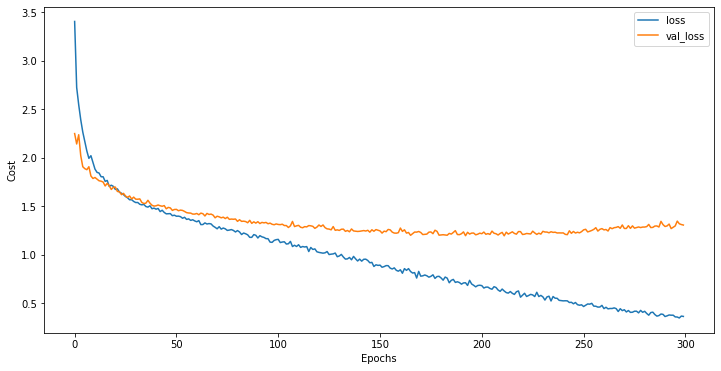

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn3.history["loss"], label="loss")
plt.plot(cnn3.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

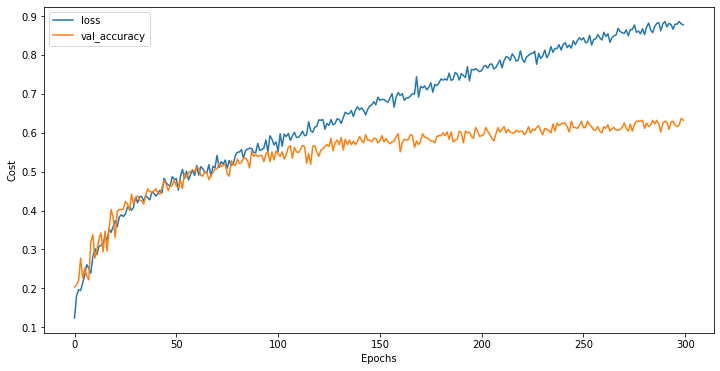

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn3.history["accuracy"], label="loss")
plt.plot(cnn3.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

PDA plus model

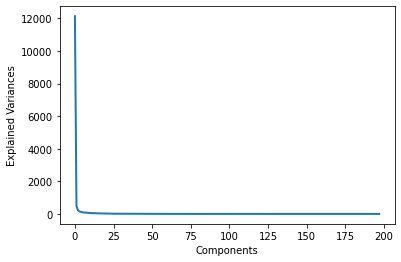

In [ ]:
#To find the optimal number of components for pca
from sklearn.decomposition import PCA
X3 = data.iloc[:,1:-1].values
y3 = data.iloc[:,-1].values


pca = PCA().fit(X3)
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [ ]:
pca = PCA(n_components=50)
X3 = pca.fit_transform(X3)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[8.54116515e-01 3.39298362e-02 1.58442062e-02 1.05523634e-02
 8.95183037e-03 6.80148048e-03 5.95965170e-03 5.78208334e-03
 4.82638742e-03 4.23975623e-03 3.61046869e-03 3.35380585e-03
 3.03754324e-03 2.88988552e-03 2.55269449e-03 2.47512718e-03
 2.27648980e-03 2.13583371e-03 1.83852293e-03 1.72670078e-03
 1.53203345e-03 1.49968367e-03 1.33184612e-03 1.22360542e-03
 1.06325115e-03 9.42160369e-04 9.07429155e-04 8.63369402e-04
 8.25203563e-04 7.82547957e-04 7.04602924e-04 6.85535606e-04
 6.32397300e-04 6.20727879e-04 5.48578935e-04 5.05277073e-04
 4.92569758e-04 4.49972016e-04 4.36531543e-04 4.05251376e-04
 3.84316220e-04 3.55954434e-04 3.35058634e-04 3.19972109e-04
 3.02160150e-04 2.89754051e-04 2.75757399e-04 2.67373380e-04
 2.54905482e-04 2.39738067e-04]
[4178.80754243  832.88433061  569.15303172  464.48177717  427.80881816
  372.90270881  349.06334791  343.82383779  314.1267352   294.41792927
  271.69121868  261.85614471  249.20402046  243.07154959  228.45108815
  224.95340445  215.738

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y3 = encoder.fit_transform(y2)
data['labels']
print(y3)

[7 5 2 ... 6 2 0]


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X3,y3)

SVM with pca

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

0.5231481481481481
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        57
           1       0.68      0.69      0.68        61
           2       0.45      0.49      0.46        68
           3       0.43      0.53      0.48        47
           4       0.54      0.44      0.49        57
           5       0.45      0.36      0.40        28
           6       0.39      0.42      0.40        55
           7       0.63      0.58      0.60        59

    accuracy                           0.52       432
   macro avg       0.52      0.51      0.51       432
weighted avg       0.53      0.52      0.52       432

[[34  1 10  4  3  1  1  3]
 [ 3 42  3  3  0  3  7  0]
 [ 6  7 33  4  4  1  9  4]
 [ 3  1  3 25  6  1  4  4]
 [ 7  0  7  8 25  0  6  4]
 [ 0  5  4  0  1 10  8  0]
 [ 4  6  3  7  4  3 23  5]
 [ 0  0 11  7  3  3  1 34]]


SVM without pca

In [ ]:
X3 = data.iloc[:,1:-1].values
y3 = data.iloc[:,-1].values
encoder = LabelEncoder()
y3 = encoder.fit_transform(y2)
data['labels']
print(y3)
X_train, X_test, y_train, y_test = split_scale(X3,y3)


svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

[7 5 2 ... 6 2 0]
0.5162037037037037
              precision    recall  f1-score   support

           0       0.60      0.58      0.59        57
           1       0.64      0.77      0.70        61
           2       0.42      0.38      0.40        68
           3       0.39      0.51      0.44        47
           4       0.49      0.47      0.48        57
           5       0.42      0.36      0.38        28
           6       0.37      0.31      0.34        55
           7       0.70      0.66      0.68        59

    accuracy                           0.52       432
   macro avg       0.50      0.51      0.50       432
weighted avg       0.51      0.52      0.51       432

[[33  2 10  1  6  0  0  5]
 [ 1 47  1  2  1  4  5  0]
 [ 8  9 26  8  5  3  6  3]
 [ 4  1  5 24  5  0  4  4]
 [ 5  0  4  9 27  2  6  4]
 [ 0  5  3  1  2 10  7  0]
 [ 3  8  5 11  7  3 17  1]
 [ 1  1  8  5  2  2  1 39]]


Added features-sound data

In [ ]:
dataset4 = pd.read_csv('dataset4.csv')

In [ ]:
X4 = dataset4.iloc[:,1:-1].values
y4 = dataset4.iloc[:,-1].values

X4.shape,y4.shape


((2452, 198), (2452,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y4 = encoder.fit_transform(y4)

print(y4)

[4 4 5 ... 1 0 4]


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X4,y4)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1839, 198, 1)

In [ ]:
model4 = Sequential()

model4.add(Conv1D(128, 3,padding='same',input_shape=(198,1)))        
model4.add(Activation('relu'))
model4.add(Dropout(0.1))
model4.add(MaxPooling1D(pool_size=(2)))

model4.add(Conv1D(128, 3,padding='same'))        
model4.add(Activation('relu'))
model4.add(MaxPooling1D(pool_size=(2)))
model4.add(Dropout(0.1))


model4.add(Conv1D(128, 3,padding='same'))                          
model4.add(Activation('relu'))
model4.add(MaxPooling1D(pool_size=(2)))
model4.add(Dropout(0.1))

model4.add(Flatten())
model4.add(Dense(8))                                                 
model4.add(Activation('softmax'))

opt = optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 198, 128)          512       
                                                                 
 activation_23 (Activation)  (None, 198, 128)          0         
                                                                 
 dropout_13 (Dropout)        (None, 198, 128)          0         
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 99, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 99, 128)           49280     
                                                                 
 activation_24 (Activation)  (None, 99, 128)           0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
cnn4 = model4.fit(X_train, y_train, batch_size=15, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
123/123 [==============================] - 6s 40ms/step - loss: 2.7311 - accuracy: 0.1659 - val_loss: 1.8764 - val_accuracy: 0.2284
Epoch 2/300
123/123 [==============================] - 5s 38ms/step - loss: 2.3524 - accuracy: 0.2077 - val_loss: 1.8780 - val_accuracy: 0.2235
Epoch 3/300
123/123 [==============================] - 5s 38ms/step - loss: 2.1231 - accuracy: 0.2431 - val_loss: 1.7819 - val_accuracy: 0.3002
Epoch 4/300
123/123 [==============================] - 5s 38ms/step - loss: 2.0209 - accuracy: 0.2567 - val_loss: 1.7216 - val_accuracy: 0.3442
Epoch 5/300
123/123 [==============================] - 5s 38ms/step - loss: 1.9378 - accuracy: 0.2757 - val_loss: 1.7159 - val_accuracy: 0.3507
Epoch 6/300
123/123 [==============================] - 5s 38ms/step - loss: 1.8625 - accuracy: 0.2811 - val_loss: 1.6654 - val_accuracy: 0.3915
Epoch 7/300
123/123 [==============================] - 5s 38ms/step - loss: 1.7922 - accuracy: 0.3061 - val_loss: 1.6389 - val_accuracy:

In [ ]:
loss, acc = model4.evaluate(X_test, y_test)
print("Accuracy: {:5.2f}%".format(100*acc))

20/20 [==============================] - 0s 16ms/step - loss: 0.9283 - accuracy: 0.7259
Accuracy: 72.59%


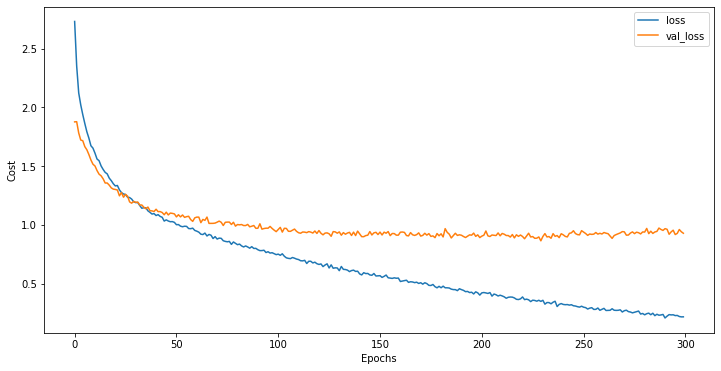

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn4.history["loss"], label="loss")
plt.plot(cnn4.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

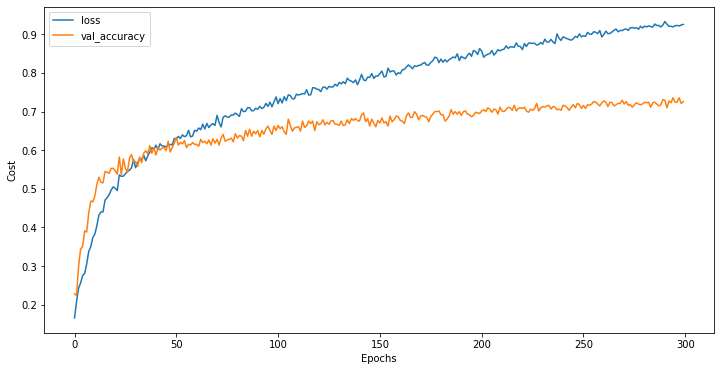

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn4.history["accuracy"], label="loss")
plt.plot(cnn4.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X4 = dataset4.iloc[:,1:-1].values
y4 = dataset4.iloc[:,-1].values
encoder = LabelEncoder()
y4 = encoder.fit_transform(y4)
pca = PCA(n_components=50)
X4 = pca.fit_transform(X4)

X_train, X_test, y_train, y_test = split_scale(X4,y4)


svm_model_linear = SVC(kernel = 'linear', C = 1,decision_function_shape='ovo').fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

0.5865580448065173
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        72
           1       0.70      0.75      0.72        87
           2       0.42      0.47      0.45        36
           3       0.56      0.45      0.50        88
           4       0.53      0.48      0.51        66
           5       0.58      0.50      0.54        38
           6       0.53      0.62      0.57        73
           7       0.66      0.61      0.63        31

    accuracy                           0.59       491
   macro avg       0.58      0.57      0.57       491
weighted avg       0.59      0.59      0.58       491

[[51  1  7  7  2  0  3  1]
 [ 0 65  1  1  9  5  6  0]
 [ 7  1 17  2  5  1  2  1]
 [15  5  3 40  6  3 13  3]
 [ 5  4  5  6 32  3  8  3]
 [ 0  4  2  3  2 19  8  0]
 [ 1 12  2  8  2  1 45  2]
 [ 1  1  3  4  2  1  0 19]]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X4 = dataset4.iloc[:,1:-1].values
y4 = dataset4.iloc[:,-1].values
encoder = LabelEncoder()
scaler = MinMaxScaler()
X4 = scaler.fit_transform(X4)
y4 = encoder.fit_transform(y4)
pca = PCA(n_components=50)
X4 = pca.fit_transform(X4)

X_train, X_test, y_train, y_test = split_scale(X4,y4)


svm_model_linear = SVC(kernel = 'linear', C = 1,decision_function_shape='ovo').fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

0.600326264274062
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        91
           1       0.62      0.84      0.71        88
           2       0.37      0.40      0.38        45
           3       0.43      0.53      0.48        81
           4       0.69      0.50      0.58        98
           5       0.84      0.45      0.58        47
           6       0.59      0.54      0.56       109
           7       0.59      0.70      0.64        54

    accuracy                           0.60       613
   macro avg       0.61      0.59      0.59       613
weighted avg       0.62      0.60      0.60       613

[[66  0  7 12  0  1  0  5]
 [ 0 74  5  1  3  0  5  0]
 [ 5  2 18  3  5  0  5  7]
 [ 7  5  1 43  5  1 12  7]
 [ 4 14  7 18 49  0  5  1]
 [ 0  8  2  1  3 21 10  2]
 [ 3 14  5 17  5  2 59  4]
 [ 1  2  4  4  1  0  4 38]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300,max_features='sqrt',random_state=25)
rfc.fit(X_train,y_train)

rfc_predict = rfc.predict(X_test)

print(accuracy_score(y_true=y_test,y_pred=rfc_predict))
print(classification_report(y_test,rfc_predict)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, rfc_predict) )


0.7079934747145188
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        91
           1       0.65      0.88      0.75        88
           2       0.72      0.58      0.64        45
           3       0.57      0.74      0.65        81
           4       0.79      0.64      0.71        98
           5       0.78      0.53      0.63        47
           6       0.76      0.69      0.72       109
           7       0.61      0.67      0.64        54

    accuracy                           0.71       613
   macro avg       0.72      0.69      0.69       613
weighted avg       0.72      0.71      0.71       613

[[72  1  5  3  3  1  0  6]
 [ 0 77  1  0  4  2  4  0]
 [ 3  2 26  2  2  1  4  5]
 [ 5  3  1 60  0  1  7  4]
 [ 2 11  1 17 63  0  1  3]
 [ 0 11  0  2  0 25  6  3]
 [ 1 11  1 16  3  0 75  2]
 [ 1  2  1  5  5  2  2 36]]


Multi Layer Perceptron 


In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(200,200,200,200),random_state=50,batch_size=200,
                    max_iter=500,epsilon=1e-08,learning_rate='adaptive')
    
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
mlp.score(X_test,y_test)
print(accuracy_score(y_true=y_test,y_pred=mlp_pred))
print(classification_report(y_test,mlp_pred)) 
print(confusion_matrix(y_test, mlp_pred) )



0.734094616639478
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        91
           1       0.86      0.70      0.78        88
           2       0.59      0.60      0.59        45
           3       0.67      0.74      0.71        81
           4       0.88      0.68      0.77        98
           5       0.58      0.81      0.67        47
           6       0.80      0.72      0.76       109
           7       0.58      0.78      0.67        54

    accuracy                           0.73       613
   macro avg       0.72      0.73      0.72       613
weighted avg       0.75      0.73      0.74       613

[[75  0  5  4  0  0  1  6]
 [ 3 62  3  0  2 12  6  0]
 [ 4  0 27  1  1  3  1  8]
 [ 3  0  3 60  3  1  7  4]
 [ 7  5  1  9 67  1  2  6]
 [ 0  4  1  0  0 38  2  2]
 [ 1  1  2 13  1  8 79  4]
 [ 0  0  4  2  2  3  1 42]]


201


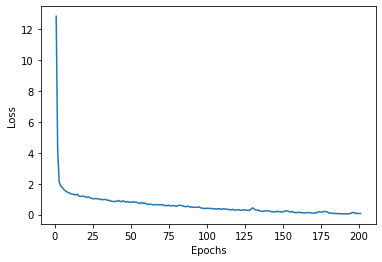

In [ ]:
loss = mlp.loss_curve_

length = len(loss)
print(length)
x = [i for i in range(1,length+1)]
plt.plot(x,loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

RAVDESS + CREMAD


In [ ]:
data_combined = pd.read_csv('dataset5.csv')

X5 = data_combined.iloc[:,1:-1].values
y5 = data_combined.iloc[:,-1].values



In [ ]:
X5.shape,y5.shape

((9894, 198), (9894,))

In [ ]:
print(y5)

['neutral' 'angry' 'happy' ... 'fear' 'fear' 'disgust']


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y5 = encoder.fit_transform(y5)
print(y5)

[5 0 4 ... 3 3 2]


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X5,y5)

In [ ]:
model5 = Sequential()

model5.add(Conv1D(32, 3,padding='same',input_shape=(198,1)))        
model5.add(Activation('relu'))
model5.add(Conv1D(32, 3,padding='same'))        
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
model5.add(MaxPooling1D(pool_size=(2)))

model5.add(Conv1D(64, 3,padding='same'))        
model5.add(Activation('relu'))
model5.add(Conv1D(64, 3,padding='same'))        
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
model5.add(MaxPooling1D(pool_size=(2)))

model5.add(Conv1D(128, 3,padding='same'))        
model5.add(Activation('relu'))
model5.add(Conv1D(128, 3,padding='same'))        
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
model5.add(MaxPooling1D(pool_size=(2)))

model5.add(Flatten())
model5.add(Dense(64))                                                 
model5.add(Activation('softmax'))
model5.add(Dense(8))                                                 
model5.add(Activation('softmax'))

opt = optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=None, decay=0.0)
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 198, 32)           128       
                                                                 
 activation_27 (Activation)  (None, 198, 32)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 198, 32)           3104      
                                                                 
 activation_28 (Activation)  (None, 198, 32)           0         
                                                                 
 dropout_16 (Dropout)        (None, 198, 32)           0         
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 99, 32)           0         
 g1D)                                                            
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model5.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
cnn5 = model5.fit(X_train, y_train, batch_size=20, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
371/371 [==============================] - 18s 44ms/step - loss: 1.9722 - accuracy: 0.2323 - val_loss: 1.9463 - val_accuracy: 0.2247
Epoch 2/500
371/371 [==============================] - 16s 43ms/step - loss: 1.8961 - accuracy: 0.2499 - val_loss: 1.8624 - val_accuracy: 0.2922
Epoch 3/500
371/371 [==============================] - 15s 42ms/step - loss: 1.8342 - accuracy: 0.3020 - val_loss: 1.8041 - val_accuracy: 0.2935
Epoch 4/500
371/371 [==============================] - 16s 42ms/step - loss: 1.7916 - accuracy: 0.2954 - val_loss: 1.7662 - val_accuracy: 0.2959
Epoch 5/500
371/371 [==============================] - 16s 42ms/step - loss: 1.7577 - accuracy: 0.2985 - val_loss: 1.7423 - val_accuracy: 0.2939
Epoch 6/500
371/371 [==============================] - 16s 42ms/step - loss: 1.7277 - accuracy: 0.3034 - val_loss: 1.7275 - val_accuracy: 0.2922
Epoch 7/500
371/371 [==============================] - 16s 42ms/step - loss: 1.7052 - accuracy: 0.3111 - val_loss: 1.6823 - val_ac

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X5 = data_combined.iloc[:,1:-1].values
y5 = data_combined.iloc[:,-1].values
encoder = LabelEncoder()
scaler = MinMaxScaler()
X5 = scaler.fit_transform(X5)
y5 = encoder.fit_transform(y5)
pca = PCA(n_components=50)
X5 = pca.fit_transform(X5)

X_train, X_test, y_train, y_test = split_scale(X5,y5)


svm_model_linear = SVC(kernel = 'rbf', C = 1,decision_function_shape='ovo').fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

0.540016168148747
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       400
           1       0.71      0.94      0.81       107
           2       0.50      0.39      0.44       384
           3       0.51      0.40      0.45       402
           4       0.52      0.45      0.48       435
           5       0.44      0.50      0.47       292
           6       0.51      0.62      0.56       406
           7       0.57      0.83      0.68        48

    accuracy                           0.54      2474
   macro avg       0.55      0.61      0.57      2474
weighted avg       0.54      0.54      0.53      2474

[[289   1  19  26  47  10   6   2]
 [  0 101   2   1   1   0   2   0]
 [ 39   3 150  21  43  53  68   7]
 [ 41   0  28 160  46  30  91   6]
 [ 61   7  43  60 196  32  27   9]
 [  2  16  27  19  27 147  51   3]
 [  2  14  30  27  17  60 253   3]
 [  0   1   3   0   3   0   1  40]]


In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(400,),random_state=50,batch_size=200,
                    max_iter=1000,epsilon=1e-08,learning_rate='adaptive')
    
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
mlp.score(X_test,y_test)
print(accuracy_score(y_true=y_test,y_pred=mlp_pred))
print(classification_report(y_test,mlp_pred)) 
print(confusion_matrix(y_test, mlp_pred) )



ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600,max_features='sqrt',random_state=25)
rfc.fit(X_train,y_train)

rfc_predict = rfc.predict(X_test)

print(accuracy_score(y_true=y_test,y_pred=rfc_predict))
print(classification_report(y_test,rfc_predict)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, rfc_predict) )


0.5052546483427648
              precision    recall  f1-score   support

           0       0.56      0.74      0.64       400
           1       0.75      0.94      0.83       107
           2       0.48      0.29      0.36       384
           3       0.52      0.36      0.42       402
           4       0.47      0.44      0.45       435
           5       0.39      0.47      0.42       292
           6       0.49      0.58      0.53       406
           7       0.70      0.69      0.69        48

    accuracy                           0.51      2474
   macro avg       0.54      0.56      0.54      2474
weighted avg       0.50      0.51      0.49      2474

[[297   2  13  16  47  18   5   2]
 [  0 101   1   1   1   2   1   0]
 [ 52   4 113  23  60  56  73   3]
 [ 60   2  19 144  55  35  84   3]
 [ 95   7  26  51 191  35  26   4]
 [  9  10  28  13  36 137  58   1]
 [ 10   9  35  30  15  72 234   1]
 [  6   0   2   1   5   0   1  33]]


ValueError: ignored

CREMA D

In [ ]:
dataset_crema = pd.read_csv('dataset6.csv')

In [ ]:
X6 = dataset_crema.iloc[:,1:-1].values
y6 = dataset_crema.iloc[:,-1].values

X6.shape,y6.shape

((7442, 193), (7442,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y6 = encoder.fit_transform(y6)
print(y6)

[1 4 2 ... 5 0 2]


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X6,y6)

In [ ]:
X_train.shape

(5581, 193)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000,max_features='sqrt',random_state=25)
rfc.fit(X_train,y_train)

rfc_predict = rfc.predict(X_test)

print(accuracy_score(y_true=y_test,y_pred=rfc_predict))
print(classification_report(y_test,rfc_predict)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, rfc_predict) )


0.46695325094035467
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       317
           1       0.43      0.26      0.32       319
           2       0.57      0.20      0.30       322
           3       0.42      0.46      0.44       340
           4       0.35      0.52      0.42       258
           5       0.49      0.69      0.57       305

    accuracy                           0.47      1861
   macro avg       0.48      0.47      0.45      1861
weighted avg       0.48      0.47      0.45      1861

[[219  16   3  64  12   3]
 [ 26  83   9  60  68  73]
 [ 48  27  65  50  54  78]
 [ 70  25  13 157  58  17]
 [  2  28   9  32 134  53]
 [  1  15  15   7  56 211]]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X6 = dataset_crema.iloc[:,1:-1].values
y6 = dataset_crema.iloc[:,-1].values
encoder = LabelEncoder()
scaler = MinMaxScaler()
X6 = scaler.fit_transform(X6)
y6 = encoder.fit_transform(y6)
pca = PCA(n_components=50)
X6 = pca.fit_transform(X6)

X_train, X_test, y_train, y_test = split_scale(X6,y6)


svm_model_linear = SVC(kernel = 'linear', C = 1,decision_function_shape='ovo').fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

0.43148844707146694
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       317
           1       0.36      0.33      0.34       319
           2       0.33      0.23      0.27       322
           3       0.42      0.39      0.40       340
           4       0.33      0.34      0.33       258
           5       0.47      0.69      0.56       305

    accuracy                           0.43      1861
   macro avg       0.42      0.43      0.42      1861
weighted avg       0.42      0.43      0.42      1861

[[195  26  21  60  12   3]
 [ 24 106  24  34  55  76]
 [ 44  32  73  54  33  86]
 [ 47  60  53 131  34  15]
 [  3  53  28  27  87  60]
 [  2  20  24   5  43 211]]


In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape


(5581, 193, 1)

In [ ]:
model6 = Sequential()

model6.add(Conv1D(32, 3,padding='same',input_shape=(193,1)))        
model6.add(Activation('relu'))
model6.add(Dropout(0.1))
model6.add(MaxPooling1D(pool_size=(2)))

model6.add(Conv1D(64, 3,padding='same'))        
model6.add(Activation('relu'))
model6.add(MaxPooling1D(pool_size=(2)))
model6.add(Dropout(0.1))


model6.add(Conv1D(128, 3,padding='same'))                          
model6.add(Activation('relu'))
model6.add(MaxPooling1D(pool_size=(2)))
model6.add(Dropout(0.1))

model6.add(Conv1D(128, 3,padding='same'))                          
model6.add(Activation('relu'))
model6.add(MaxPooling1D(pool_size=(2)))
model6.add(Dropout(0.1))

model6.add(Flatten())
model6.add(Dense(8))                                                 
model6.add(Activation('softmax'))

opt = optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 193, 32)           128       
                                                                 
 activation_8 (Activation)   (None, 193, 32)           0         
                                                                 
 dropout_6 (Dropout)         (None, 193, 32)           0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 96, 32)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 96, 64)            6208      
                                                                 
 activation_9 (Activation)   (None, 96, 64)            0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model6.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
cnn6 = model6.fit(X_train, y_train, batch_size=15, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
373/373 [==============================] - 9s 23ms/step - loss: 2.0797 - accuracy: 0.2340 - val_loss: 1.6366 - val_accuracy: 0.3149
Epoch 2/300
373/373 [==============================] - 8s 22ms/step - loss: 1.7332 - accuracy: 0.2799 - val_loss: 1.5881 - val_accuracy: 0.3439
Epoch 3/300
373/373 [==============================] - 8s 21ms/step - loss: 1.6455 - accuracy: 0.3087 - val_loss: 1.5667 - val_accuracy: 0.3477
Epoch 4/300
373/373 [==============================] - 8s 21ms/step - loss: 1.6142 - accuracy: 0.3111 - val_loss: 1.5404 - val_accuracy: 0.3595
Epoch 5/300
373/373 [==============================] - 8s 22ms/step - loss: 1.5783 - accuracy: 0.3370 - val_loss: 1.5459 - val_accuracy: 0.3745
Epoch 6/300
373/373 [==============================] - 8s 21ms/step - loss: 1.5558 - accuracy: 0.3417 - val_loss: 1.5125 - val_accuracy: 0.3939
Epoch 7/300
373/373 [==============================] - 8s 21ms/step - loss: 1.5395 - accuracy: 0.3537 - val_loss: 1.5154 - val_accuracy:

In [ ]:
loss, acc = model6.evaluate(X_test, y_test)
print("Accuracy: {:5.2f}%".format(100*acc))

59/59 [==============================] - 1s 10ms/step - loss: 1.3722 - accuracy: 0.4960
Accuracy: 49.60%


Data Augmentation (https://www.kaggle.com/code/CVxTz/audio-data-augmentation/notebook)


In [ ]:
data_augmented = pd.read_csv('dataset7.csv')


In [ ]:
X7 = data_augmented.iloc[:,1:-1].values
y7 = data_augmented.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y7 = encoder.fit_transform(y7)
print(y7)

[2 2 0 ... 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X7,y7)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape


(3678, 193, 1)

In [ ]:
model7 = Sequential()

model7.add(Conv1D(128, 3,padding='same',input_shape=(193,1)))        
model7.add(Activation('relu'))
model7.add(Dropout(0.1))
model7.add(MaxPooling1D(pool_size=(2)))

model7.add(Conv1D(128, 3,padding='same'))        
model7.add(Activation('relu'))
model7.add(MaxPooling1D(pool_size=(2)))
model7.add(Dropout(0.1))


model7.add(Conv1D(128, 3,padding='same'))                          
model7.add(Activation('relu'))
model7.add(MaxPooling1D(pool_size=(2)))
model7.add(Dropout(0.1))

model7.add(Flatten())
model7.add(Dense(8))                                                 
model7.add(Activation('softmax'))

opt = optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 193, 128)          512       
                                                                 
 activation (Activation)     (None, 193, 128)          0         
                                                                 
 dropout (Dropout)           (None, 193, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           49280     
                                                                 
 activation_1 (Activation)   (None, 96, 128)           0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model7.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
cnn7 = model7.fit(X_train, y_train, batch_size=20, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
184/184 [==============================] - 12s 53ms/step - loss: 2.4094 - accuracy: 0.1794 - val_loss: 1.9074 - val_accuracy: 0.2716
Epoch 2/400
184/184 [==============================] - 9s 48ms/step - loss: 2.0275 - accuracy: 0.2493 - val_loss: 1.8262 - val_accuracy: 0.2741
Epoch 3/400
184/184 [==============================] - 9s 49ms/step - loss: 1.8873 - accuracy: 0.2716 - val_loss: 1.7483 - val_accuracy: 0.3246
Epoch 4/400
184/184 [==============================] - 9s 49ms/step - loss: 1.7878 - accuracy: 0.3089 - val_loss: 1.7165 - val_accuracy: 0.3426
Epoch 5/400
184/184 [==============================] - 9s 49ms/step - loss: 1.7340 - accuracy: 0.3328 - val_loss: 1.6413 - val_accuracy: 0.3719
Epoch 6/400
184/184 [==============================] - 9s 49ms/step - loss: 1.6567 - accuracy: 0.3801 - val_loss: 1.5857 - val_accuracy: 0.4413
Epoch 7/400
184/184 [==============================] - 9s 49ms/step - loss: 1.6081 - accuracy: 0.3864 - val_loss: 1.5525 - val_accuracy

In [ ]:
loss, acc = model7.evaluate(X_test, y_test)
print("Accuracy: {:5.2f}%".format(100*acc))

39/39 [==============================] - 1s 18ms/step - loss: 1.1594 - accuracy: 0.7178
Accuracy: 71.78%


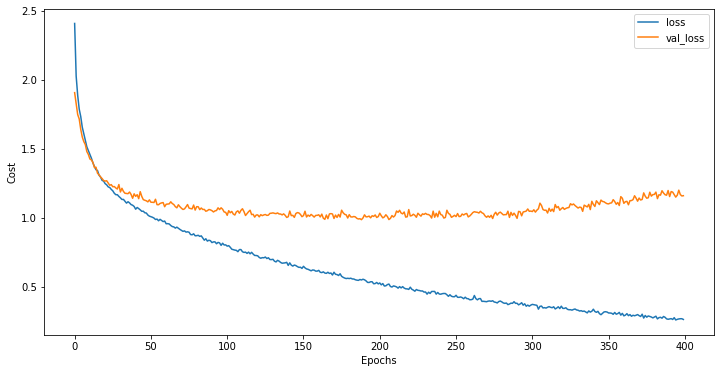

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn7.history["loss"], label="loss")
plt.plot(cnn7.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

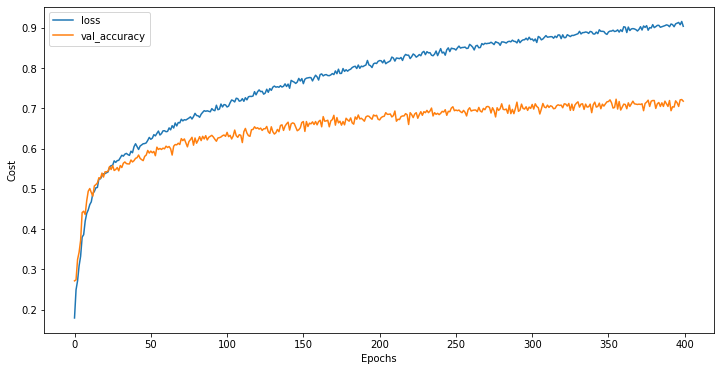

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn7.history["accuracy"], label="loss")
plt.plot(cnn7.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

Reduced Emotions 


In [ ]:
data8 = pd.read_csv('dataset7.csv')
data8.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,184,185,186,187,188,189,190,191,192,labels
0,0,-524.339844,58.945076,11.774967,26.318909,0.261554,5.660612,-3.377984,-3.362769,-9.245324,...,-0.000091,0.007732,21.961529,15.875564,19.082055,14.696499,16.397359,16.391151,29.530816,disgust
1,1,-269.140574,11.484386,8.767346,6.243472,2.747863,0.709594,-0.614465,-1.588504,-3.817834,...,-0.000729,0.002335,15.468811,13.326386,14.867802,12.761607,13.529643,13.522223,13.355271,disgust
2,2,-366.166321,61.372746,-14.820083,21.295778,-8.899424,-7.860835,-2.845897,-0.053523,-10.914480,...,-0.030637,-0.010813,22.978009,17.598611,20.942201,18.762070,18.259227,17.844183,30.877108,angry
3,3,-231.392576,29.672213,1.565719,5.466136,-4.319672,-7.645862,-0.795612,0.830001,-6.118091,...,-0.032956,0.001459,17.083159,15.874668,18.546013,16.412194,15.331840,14.713892,13.618339,angry
4,4,-536.010803,69.903397,-16.303288,32.916740,2.925880,0.171463,-12.861864,-5.886380,-12.273261,...,-0.007125,-0.016768,23.791126,19.190114,20.781159,18.825651,19.712703,20.324445,29.268788,neutral


In [ ]:
emotions_filter =  ['angry', 'sad' , 'neutral' , 'happy']
#376+376+376+188

In [ ]:
data8 = data8.loc[data8['labels'].isin(['angry', 'sad' , 'neutral' , 'happy'])]


In [ ]:
X8 = data8.iloc[:,1:-1].values
y8 = data8.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y8 = encoder.fit_transform(y8)
print(y8)

[0 0 2 ... 0 0 0]


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X8,y8)

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape


(1974, 193, 1)

In [ ]:
model8 = Sequential()

model8.add(Conv1D(128, 3,padding='same',input_shape=(193,1)))        
model8.add(Activation('relu'))
model8.add(Dropout(0.1))
model8.add(MaxPooling1D(pool_size=(2)))

model8.add(Conv1D(128, 3,padding='same'))        
model8.add(Activation('relu'))
model8.add(MaxPooling1D(pool_size=(2)))
model8.add(Dropout(0.1))


model8.add(Conv1D(128, 3,padding='same'))                          
model8.add(Activation('relu'))
model8.add(MaxPooling1D(pool_size=(2)))
model8.add(Dropout(0.1))

model8.add(Flatten())
model8.add(Dense(8))                                                 
model8.add(Activation('softmax'))

opt = optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
model8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 193, 128)          512       
                                                                 
 activation_4 (Activation)   (None, 193, 128)          0         
                                                                 
 dropout_3 (Dropout)         (None, 193, 128)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 96, 128)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 128)           49280     
                                                                 
 activation_5 (Activation)   (None, 96, 128)           0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model8.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
cnn8 = model8.fit(X_train, y_train, batch_size=20, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
99/99 [==============================] - 6s 50ms/step - loss: 1.7279 - accuracy: 0.3364 - val_loss: 1.2055 - val_accuracy: 0.4620
Epoch 2/400
99/99 [==============================] - 5s 48ms/step - loss: 1.5019 - accuracy: 0.3779 - val_loss: 1.1257 - val_accuracy: 0.5228
Epoch 3/400
99/99 [==============================] - 5s 47ms/step - loss: 1.3438 - accuracy: 0.4235 - val_loss: 1.1401 - val_accuracy: 0.4590
Epoch 4/400
99/99 [==============================] - 6s 58ms/step - loss: 1.2558 - accuracy: 0.4564 - val_loss: 1.0988 - val_accuracy: 0.5334
Epoch 5/400
99/99 [==============================] - 10s 98ms/step - loss: 1.1936 - accuracy: 0.4757 - val_loss: 1.0292 - val_accuracy: 0.5365
Epoch 6/400
99/99 [==============================] - 10s 102ms/step - loss: 1.1533 - accuracy: 0.4980 - val_loss: 0.9910 - val_accuracy: 0.5805
Epoch 7/400
99/99 [==============================] - 8s 81ms/step - loss: 1.0932 - accuracy: 0.5162 - val_loss: 0.9571 - val_accuracy: 0.6216
Epo

In [ ]:
loss, acc = model8.evaluate(X_test, y_test)
print("Accuracy: {:5.2f}%".format(100*acc))

21/21 [==============================] - 0s 16ms/step - loss: 0.4768 - accuracy: 0.8647
Accuracy: 86.47%


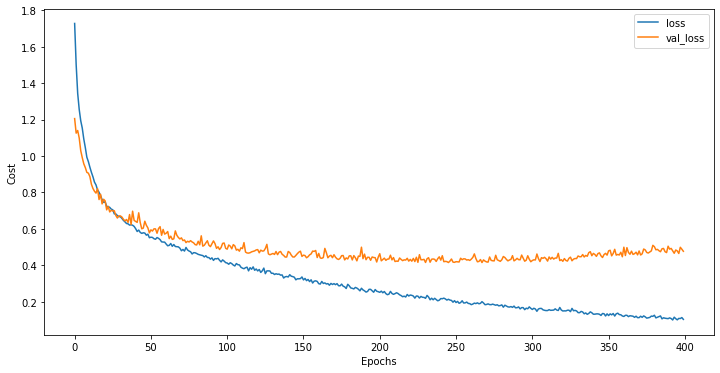

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn8.history["loss"], label="loss")
plt.plot(cnn8.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

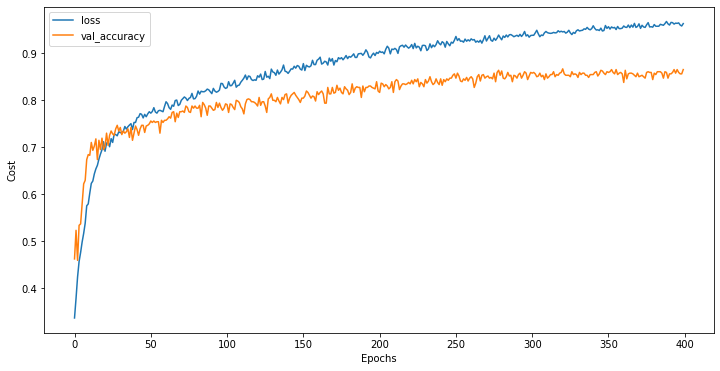

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cnn8.history["accuracy"], label="loss")
plt.plot(cnn8.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300,max_features='sqrt',random_state=25)
rfc.fit(X_train,y_train)

rfc_predict = rfc.predict(X_test)

print(accuracy_score(y_true=y_test,y_pred=rfc_predict))
print(classification_report(y_test,rfc_predict)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, rfc_predict) )
print(rfc.feature_importances_)

0.8085106382978723
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       182
           1       0.83      0.80      0.82       180
           2       0.93      0.60      0.73       106
           3       0.72      0.85      0.78       190

    accuracy                           0.81       658
   macro avg       0.83      0.79      0.80       658
weighted avg       0.82      0.81      0.81       658

[[162   8   1  11]
 [ 22 144   1  13]
 [  0   3  64  39]
 [  7  18   3 162]]
[0.00198463 0.00253454 0.0027987  0.00266961 0.00354369 0.00304515
 0.00383547 0.00251506 0.00248751 0.00343159 0.00367477 0.00308894
 0.00369948 0.00391445 0.00631562 0.00515751 0.0051556  0.00391675
 0.00457693 0.00398536 0.00296739 0.00253825 0.00340313 0.00349976
 0.00327477 0.00352812 0.00353112 0.00372829 0.00346392 0.0070302
 0.02337563 0.01008071 0.00753604 0.00537652 0.00465939 0.00580729
 0.00545681 0.0053129  0.00442951 0.00478723 0.00310571 0.00187783
 

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(400,),random_state=50,batch_size=200,
                    max_iter=1000,epsilon=1e-08,learning_rate='adaptive')
    
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
mlp.score(X_test,y_test)
print(accuracy_score(y_true=y_test,y_pred=mlp_pred))
print(classification_report(y_test,mlp_pred)) 
print(confusion_matrix(y_test, mlp_pred) )



0.8632218844984803
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       182
           1       0.93      0.88      0.90       180
           2       0.79      0.74      0.76       106
           3       0.79      0.87      0.83       190

    accuracy                           0.86       658
   macro avg       0.86      0.85      0.85       658
weighted avg       0.87      0.86      0.86       658

[[167   2   5   8]
 [ 10 158   2  10]
 [  0   3  78  25]
 [  4   7  14 165]]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


pca = PCA(n_components=50)
X8 = pca.fit_transform(X8)

X_train, X_test, y_train, y_test = split_scale(X8,y8)


svm_model_linear = SVC(kernel = 'linear', C = 1,decision_function_shape='ovo').fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 


print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y_test, svm_predictions) )

0.723404255319149
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       182
           1       0.69      0.74      0.71       180
           2       0.81      0.63      0.71       106
           3       0.70      0.75      0.72       190

    accuracy                           0.72       658
   macro avg       0.74      0.71      0.72       658
weighted avg       0.73      0.72      0.72       658

[[133  28   3  18]
 [ 27 134   3  16]
 [  3   8  67  28]
 [ 13  25  10 142]]


Testing using Real Data

In [ ]:
test_data = pd.read_csv('test_berlin.csv')
test_data.head()

In [ ]:
emotions_filter =  ['angry', 'sad' , 'neutral' , 'happy']
#376+376+376+188

In [ ]:
test_data = test_data.loc[test_data['labels'].isin(['angry', 'sad' , 'neutral' , 'happy'])]


In [ ]:
X_erli = test_data.iloc[:,1:-1].values
y_erli = test_data.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_erli = encoder.fit_transform(y_erli)
print(y_erli)

[1 1 0 0 0 0 3 0 0 3 2 0 3 3 1 2 0 1 0 0 2 3 3 2 0 0 0 3 1 3 0 1 1 0 3 3 0
 0 0 3 1 0 1 1 1 2 0 3 0 1 3 1 2 3 1 3 0 0 2 3 0 2 3 2 2 3 0 1 2 0 2 0 1 1
 0 2 0 3 1 2 0 3 0 0 1 0 3 3 1 2 3 0 3 3 0 0 0 0 3 0 3 3 3 3 0 0 0 0 1 3 0
 3 3 3 2 0 3 2 0 3 0 0 2 2 3 3 2 0 2 0 3 3 3 0 1 0 0 2 0 0 3 3 1 3 1 0 3 2
 1 0 0 2 0 1 1 3 1 1 2 3 0 3 0 2 3 0 3 3 0 3 2 3 2 1 1 3 3 1 2 3 0 2 0 1 0
 2 3 0 0 3 3 0 3 2 3 3 0 2 3 3 0 1 0 3 0 0 3 2 1 2 3 2 0 2 0 3 3 3 3 2 0 3
 1 2 3 1 2 3 2 1 1 3 3 0 3 1 2 3 1 2 1 2 3 0 3 3 2 2 3 0 1 3 1 3 1 0 0 2 3
 1 3 2 2 3 1 0 0 2 1 2 2 3 3 2 0 0 3 0 0 3 3 2 0 0 1 1 0 3 0 3 3 3 1 0 0 1
 3 3 3 3 3 0 0 2 3 0 2 3 0 0 3 0 0 2 0 1 3 3 3 3 1 1 3 2 3 3 3 3 1 0 0 1 0
 3 0 3 2 1 2 3 3 2 2 1 3 3 1 2 3 2 0 1 2 2 3 1 3 2 3 0 0 2 0 1 2 2 3 3 0 0
 0 0 3 0 0 3 3 1 1 3 3 3 0 0 2 0 1 1 2 2 0 3 3 2 1 3 0 3 3 0 3 2 0 3 1 3 0
 1 0 3 2 0 2 3 0 2 3 3 2 1]


In [ ]:
#Testing Random Forest Classifier

rfc_predict = rfc.predict(X)

print(accuracy_score(y_true=y,y_pred=rfc_predict))
print(classification_report(y,rfc_predict)) 
# creating a confusion matrix 
print(confusion_matrix(y, rfc_predict) )



0.3119047619047619
              precision    recall  f1-score   support

           0       0.34      1.00      0.50       127
           1       0.09      0.06      0.07        71
           2       0.00      0.00      0.00        79
           3       0.00      0.00      0.00       143

    accuracy                           0.31       420
   macro avg       0.11      0.26      0.14       420
weighted avg       0.12      0.31      0.16       420

[[127   0   0   0]
 [ 67   4   0   0]
 [ 67  12   0   0]
 [116  27   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
    

mlp_pred = mlp.predict(X)
mlp.score(X,y)
print(accuracy_score(y_true=y,y_pred=mlp_pred))
print(classification_report(y,mlp_pred)) 
print(confusion_matrix(y, mlp_pred) )


0.5452380952380952
              precision    recall  f1-score   support

           0       0.60      0.82      0.70       127
           1       0.41      0.28      0.33        71
           2       0.37      0.44      0.40        79
           3       0.67      0.49      0.56       143

    accuracy                           0.55       420
   macro avg       0.51      0.51      0.50       420
weighted avg       0.55      0.55      0.54       420

[[104  22   1   0]
 [ 49  20   1   1]
 [  6   4  35  34]
 [ 13   3  57  70]]


In [ ]:
X = pca.fit_transform(X)
svm_predictions = svm_model_linear.predict(X) 


print(accuracy_score(y_true=y,y_pred=svm_predictions))
print(classification_report(y,svm_predictions)) 
# creating a confusion matrix 
print(confusion_matrix(y, svm_predictions) )

0.1880952380952381
              precision    recall  f1-score   support

           0       0.18      0.21      0.20       127
           1       0.10      0.08      0.09        71
           2       0.15      0.29      0.20        79
           3       0.39      0.16      0.23       143

    accuracy                           0.19       420
   macro avg       0.21      0.19      0.18       420
weighted avg       0.23      0.19      0.19       420

[[27 29 62  9]
 [15  6 36 14]
 [34  9 23 13]
 [72 14 34 23]]


In [ ]:

X = np.expand_dims(X, axis=2)


loss, acc = model8.evaluate(X, y)
print("Accuracy: {:5.2f}%".format(100*acc))

14/14 [==============================] - 0s 16ms/step - loss: 27.7303 - accuracy: 0.4310
Accuracy: 43.10%


K FOlds Cross Validation

In [ ]:
from sklearn.model_selection import KFold

data8 = pd.read_csv('dataset7.csv')
data8.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,184,185,186,187,188,189,190,191,192,labels
0,0,-524.339844,58.945076,11.774967,26.318909,0.261554,5.660612,-3.377984,-3.362769,-9.245324,...,-0.000091,0.007732,21.961529,15.875564,19.082055,14.696499,16.397359,16.391151,29.530816,disgust
1,1,-269.140574,11.484386,8.767346,6.243472,2.747863,0.709594,-0.614465,-1.588504,-3.817834,...,-0.000729,0.002335,15.468811,13.326386,14.867802,12.761607,13.529643,13.522223,13.355271,disgust
2,2,-366.166321,61.372746,-14.820083,21.295778,-8.899424,-7.860835,-2.845897,-0.053523,-10.914480,...,-0.030637,-0.010813,22.978009,17.598611,20.942201,18.762070,18.259227,17.844183,30.877108,angry
3,3,-231.392576,29.672213,1.565719,5.466136,-4.319672,-7.645862,-0.795612,0.830001,-6.118091,...,-0.032956,0.001459,17.083159,15.874668,18.546013,16.412194,15.331840,14.713892,13.618339,angry
4,4,-536.010803,69.903397,-16.303288,32.916740,2.925880,0.171463,-12.861864,-5.886380,-12.273261,...,-0.007125,-0.016768,23.791126,19.190114,20.781159,18.825651,19.712703,20.324445,29.268788,neutral


In [ ]:
data8 = data8.loc[data8['labels'].isin(['angry', 'sad' , 'neutral' , 'happy'])]


In [ ]:
X = data8.iloc[:,1:-1].values
y = data8.iloc[:,-1].values
print(y)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

['angry' 'angry' 'neutral' ... 'angry' 'angry' 'angry']
[0 0 2 ... 0 0 0]


In [ ]:
def create_model():
  model8 = Sequential()

  model8.add(Conv1D(128, 3,padding='same',input_shape=(193,1)))        
  model8.add(Activation('relu'))
  model8.add(Dropout(0.1))
  model8.add(MaxPooling1D(pool_size=(2)))

  model8.add(Conv1D(128, 3,padding='same'))        
  model8.add(Activation('relu'))
  model8.add(MaxPooling1D(pool_size=(2)))
  model8.add(Dropout(0.1))


  model8.add(Conv1D(128, 3,padding='same'))                          
  model8.add(Activation('relu'))
  model8.add(MaxPooling1D(pool_size=(2)))
  model8.add(Dropout(0.1))

  model8.add(Flatten())
  model8.add(Dense(4))                                                 
  model8.add(Activation('softmax'))

  opt = optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
  model8.summary()
  model8.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

  return model8

In [ ]:
from sklearn.model_selection import KFold

n_split=3

for train_index,test_index in KFold(n_split).split(X):
  x_train,x_test=X[train_index],X[test_index]
  x_train = np.expand_dims(x_train, axis=2)
  x_test = np.expand_dims(x_test, axis=2)

  y_train,y_test=y[train_index],y[test_index]
  
  model=create_model()
  model.fit(x_train, y_train,epochs=400)
  
  print('Model evaluation ',model.evaluate(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 193, 128)          512       
                                                                 
 activation (Activation)     (None, 193, 128)          0         
                                                                 
 dropout (Dropout)           (None, 193, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 96, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           49280     
                                                                 
 activation_1 (Activation)   (None, 96, 128)           0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                 
 dropout_1 (Dropout)         (None, 48, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 128)           49280     
                                                                 
 activation_2 (Activation)   (None, 48, 128)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 24, 128)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 4)                 12292     
          

In [ ]:
X_train[0].shape

(193, 1)

In [ ]:
model.save("/content/drive/MyDrive/SER")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SER/assets


In [ ]:

X_erli = np.expand_dims(X_erli, axis=2)

loss, acc = model.evaluate(X_erli, y_erli)
print("Accuracy: {:5.2f}%".format(100*acc))

14/14 [==============================] - 1s 31ms/step - loss: 29.8130 - accuracy: 0.6000
Accuracy: 60.00%


In [ ]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
n_split=3

for train_index,test_index in KFold(n_split).split(X):
  x_train,x_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]
  


  mlp = MLPClassifier(hidden_layer_sizes=(400,),random_state=50,batch_size=200,
                      max_iter=1000,epsilon=1e-08,learning_rate='adaptive')
      
  mlp.fit(x_train,y_train)
  print('Predictios' )
  mlp_pred = mlp.predict(x_test)
  mlp.score(x_test,y_test)
  print(accuracy_score(y_true=y_test,y_pred=mlp_pred))
  print(classification_report(y_test,mlp_pred)) 
  print(confusion_matrix(y_test, mlp_pred) )


  


Predictios
0.7665148063781321
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       270
           1       0.71      0.76      0.74       240
           2       0.85      0.55      0.66       130
           3       0.74      0.78      0.76       238

    accuracy                           0.77       878
   macro avg       0.78      0.74      0.75       878
weighted avg       0.77      0.77      0.76       878

[[233  29   1   7]
 [ 32 183   5  20]
 [  6  16  71  37]
 [ 16  29   7 186]]
Predictios
0.7730900798175598
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       240
           1       0.94      0.65      0.77       268
           2       0.65      0.78      0.71       134
           3       0.69      0.87      0.77       235

    accuracy                           0.77       877
   macro avg       0.78      0.78      0.77       877
weighted avg       0.80      0.77      0.77     

In [ ]:
mlp_pred = mlp.predict(X_erli)
mlp.score(X_erli,y_erli)
print(accuracy_score(y_true=y_erli,y_pred=mlp_pred))
print(classification_report(y_erli,mlp_pred)) 
print(confusion_matrix(y_erli, mlp_pred) )

0.5642857142857143
              precision    recall  f1-score   support

           0       0.63      0.86      0.72       127
           1       0.41      0.34      0.37        71
           2       0.26      0.13      0.17        79
           3       0.64      0.66      0.65       143

    accuracy                           0.56       420
   macro avg       0.48      0.50      0.48       420
weighted avg       0.52      0.56      0.53       420

[[109  18   0   0]
 [ 45  24   0   2]
 [  9   8  10  52]
 [ 11   9  29  94]]


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


n_split=3

for train_index,test_index in KFold(n_split).split(X):
  x_train,x_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]
  


  rfc = RandomForestClassifier(n_estimators=300,max_features='sqrt',random_state=25)
  rfc.fit(x_train,y_train)

  rfc_predict = rfc.predict(x_test)

  print(accuracy_score(y_true=y_test,y_pred=rfc_predict))
  print(classification_report(y_test,rfc_predict)) 
  # creating a confusion matrix 
  print(confusion_matrix(y_test, rfc_predict) )


  


0.7744874715261959
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       270
           1       0.72      0.75      0.73       240
           2       0.85      0.62      0.72       130
           3       0.69      0.83      0.75       238

    accuracy                           0.77       878
   macro avg       0.79      0.76      0.77       878
weighted avg       0.79      0.77      0.78       878

[[223  34   1  12]
 [ 19 179   5  37]
 [  0   9  81  40]
 [  6  27   8 197]]
0.7616875712656784
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       240
           1       0.81      0.72      0.77       268
           2       0.90      0.69      0.78       134
           3       0.64      0.83      0.72       235

    accuracy                           0.76       877
   macro avg       0.79      0.76      0.77       877
weighted avg       0.78      0.76      0.76       877

[[185  19   4  

In [ ]:
rfc_predict = rfc.predict(X_erli)

print(accuracy_score(y_true=y_erli,y_pred=rfc_predict))
print(classification_report(y_erli,rfc_predict)) 
# creating a confusion matrix 
print(confusion_matrix(y_erli, rfc_predict) )

0.3047619047619048
              precision    recall  f1-score   support

           0       0.33      0.99      0.49       127
           1       0.06      0.03      0.04        71
           2       0.00      0.00      0.00        79
           3       0.00      0.00      0.00       143

    accuracy                           0.30       420
   macro avg       0.10      0.26      0.13       420
weighted avg       0.11      0.30      0.15       420

[[126   1   0   0]
 [ 69   2   0   0]
 [ 68  11   0   0]
 [123  20   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/SER")

In [ ]:
data = pd.read_csv('dataset7.csv')
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,184,185,186,187,188,189,190,191,192,labels
0,0,-524.339844,58.945076,11.774967,26.318909,0.261554,5.660612,-3.377984,-3.362769,-9.245324,...,-0.000091,0.007732,21.961529,15.875564,19.082055,14.696499,16.397359,16.391151,29.530816,disgust
1,1,-269.140574,11.484386,8.767346,6.243472,2.747863,0.709594,-0.614465,-1.588504,-3.817834,...,-0.000729,0.002335,15.468811,13.326386,14.867802,12.761607,13.529643,13.522223,13.355271,disgust
2,2,-366.166321,61.372746,-14.820083,21.295778,-8.899424,-7.860835,-2.845897,-0.053523,-10.914480,...,-0.030637,-0.010813,22.978009,17.598611,20.942201,18.762070,18.259227,17.844183,30.877108,angry
3,3,-231.392576,29.672213,1.565719,5.466136,-4.319672,-7.645862,-0.795612,0.830001,-6.118091,...,-0.032956,0.001459,17.083159,15.874668,18.546013,16.412194,15.331840,14.713892,13.618339,angry
4,4,-536.010803,69.903397,-16.303288,32.916740,2.925880,0.171463,-12.861864,-5.886380,-12.273261,...,-0.007125,-0.016768,23.791126,19.190114,20.781159,18.825651,19.712703,20.324445,29.268788,neutral


In [ ]:
data = data.loc[data['labels'].isin(['angry', 'sad' , 'neutral' , 'happy'])]
#angry = 0, neutral=2 happy=1 , sad = 3
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
print(y)
'''
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)'''

['angry' 'angry' 'neutral' ... 'angry' 'angry' 'angry']


'\nfrom sklearn.preprocessing import LabelEncoder\nencoder = LabelEncoder()\ny = encoder.fit_transform(y)\nprint(y)'

In [ ]:
print(y[10])
print(y[30])

sad
happy


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 2 ... 0 0 0]


In [ ]:
print(y[10])
print(y[30])

3
1


In [ ]:
X_train, X_test, y_train, y_test = split_scale(X,y)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape


(1974, 193, 1)

In [ ]:
pred = reconstructed_model.predict(X_test)

In [ ]:
pred[0]

array([1.0000000e+00, 1.7562174e-14, 4.9074312e-32, 5.2507967e-35],
      dtype=float32)